In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
dataPath = "../aqmaps/results/normal-data/data.csv"

data = pd.read_csv(dataPath)

display(data.head(2))
data["returnsClose"] = data["returnsClose"].astype(pd.Categorical(data["returnsClose"]),clone=False)
data["failed"] = data["failed"].astype(pd.Categorical(data["failed"]),clone=False)
data["pathfindingHeuristic"] = data["pathfindingHeuristic"].astype(pd.Categorical(data["pathfindingHeuristic"]),clone=False)
data["plannerType"] = data["plannerType"].astype(pd.Categorical(data["plannerType"]),clone=False)
data["distanceMatrixType"] = data["distanceMatrixType"].astype(pd.Categorical(data["distanceMatrixType"]),clone=False)



,day,month,year,moves,start x,start y,sensorsReached,returnsClose,time(ms),failed,failedCause,pathfindingHeuristic,plannerType,distanceMatrixType,AstarRelaxationFactor,hashingGridWidth,2optEpsilon
0,1,1,2021,88,-3.184662,55.942889,33,True,199.338717,False,NaN,STRAIGHT_LINE,NEAREST_INSERTION,EUCLIDIAN,1.0,0.000004,0.00003
1,1,1,2021,88,-3.184662,55.942889,33,True,75.365730,False,NaN,STRAIGHT_LINE,NEAREST_INSERTION,EUCLIDIAN,1.0,0.000004,0.00000


90.23144453312051

102.91770675236575

6.742069221601664

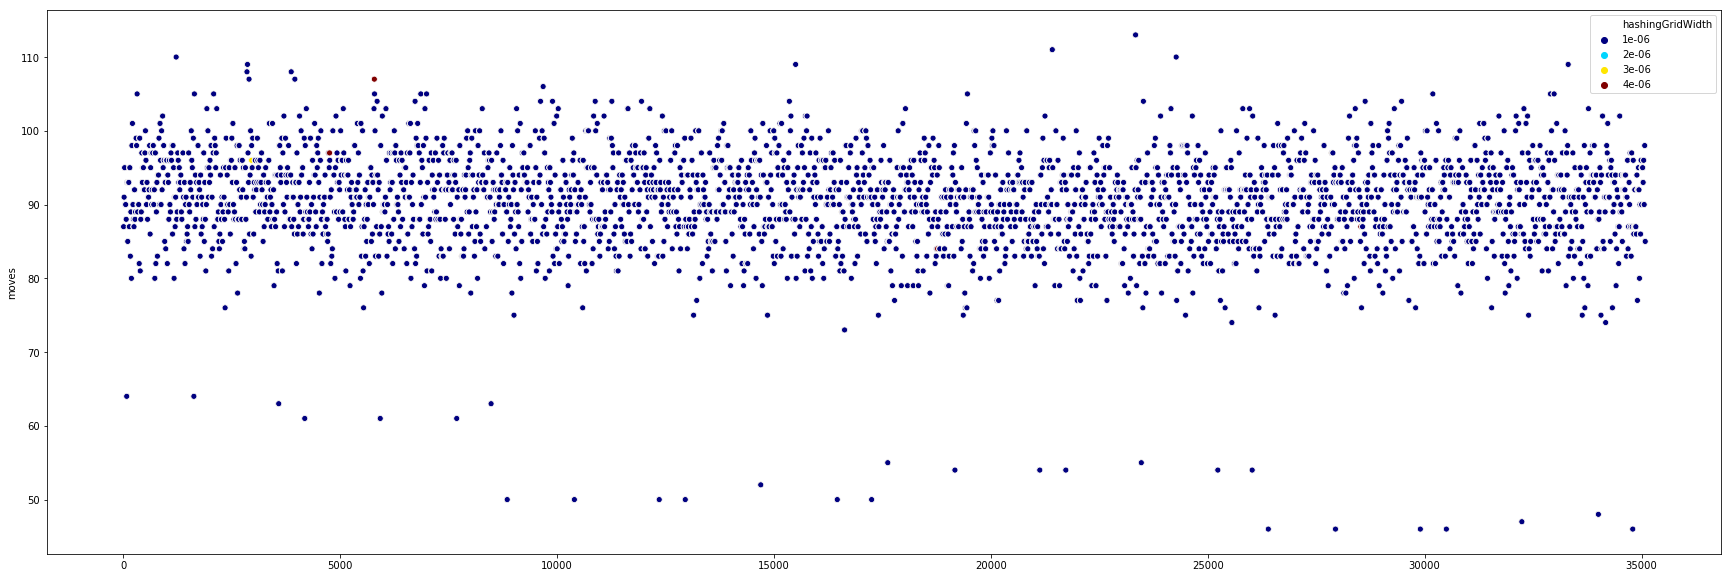

In [31]:
fig,ax = plt.subplots(1)
fig.set_size_inches(30,10)


data.mean(axis=0)

tough_day = "9-2-2020"
tough_start = "-3.19087, 55.945778"
easy_day = "2-7-2021"
easy_start = "-3.1878, 55.9444"
plannerType = data.plannerType == "NEAREST_INSERTION"
AstarRelaxationFactor = data.AstarRelaxationFactor == 1.5
epsilon = data["2optEpsilon"] != 0
distanceMatrix = data.distanceMatrixType == "EUCLIDIAN"
data_plotted = data[plannerType & AstarRelaxationFactor & epsilon & distanceMatrix]
sns.scatterplot(data=data_plotted,x=data_plotted.index,y=data_plotted.moves,hue="hashingGridWidth",palette="jet")
display(np.mean(data_plotted.moves))
display(np.mean(data_plotted["time(ms)"]))
display(np.std(data_plotted.moves))